# PHASE 1: UNDERSTANDING THE BUSINESS


**CONTEXT**
In an effort to improve public health and optimize decision-making in health policy, the Ministry of Health of Chile (MINSAL) has entrusted our team, specialized in data analysis and predictive modeling, with a critical task: to conduct a detailed analysis of mortality trends and patterns in the country. This project is part of the national health strategy, aimed at reducing health inequalities, increasing life expectancy, and improving the quality of life of the entire Chilean population.

The main objective of the project is to develop robust predictive models that will enable us to anticipate and respond more effectively to emerging public health needs. With these models, MINSAL will be able to more accurately identify high-risk groups, the leading causes of mortality, and the determinants of health, which will facilitate resource allocation and the implementation of preventive and corrective strategies to improve healthcare and reduce mortality rates.

To achieve this, our team will rely on an extensive dataset that includes records of deaths, disease diagnoses, access to healthcare services, and other critical indicators. These data allow us to analyze relationships between demographic, socioeconomic, and geographic factors to provide a holistic view of health challenges in the country.



As a team, we will focus on creating a predictive model that can determine the likely cause of death based on demographic characteristics and other associated factors. This will provide MINSAL with a tool for planning and prioritizing health policies, especially in vulnerable areas with limited access to healthcare services.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("C:/Users/victo/OneDrive/Escritorio/DEFUNCIONES OG/DefuncionesKedro/defuncioneskedro/data/01_raw/DEFUNCIONES.csv", sep=";", encoding='ISO-8859-1')

In [3]:
dfo = df.copy()

# PHASE 2: UNDERSTANDING THE DATA

We obtain the total number of records available in our dataset, which lets us know how much data we have to work with for the analysis.

In [4]:
df.shape

(341567, 27)

We display a small portion of the dataset using the head() function, which allows us to view the first few records. We can specify the number of rows we want to see to get a general idea of the dataset's content.

In [62]:
df.head(30)

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,GLOSA_CAPITULO_DIAG1,GLOSA_GRUPO_DIAG1,LUGAR_DEFUNCION,EDAD_AJUSTADA,DIAG1_encoded,GRUPO_DIAG1_ENCODED,LUGAR_SEXO_COMBINADO
0,2024,24-06-2024,2,1,-0.109668,13604,Padre Hurtado,13,Enfermedades del sistema nervioso central,Otras enfermedades degenerativas del sistema nervioso,1,73,11,93,1_2
1,2024,27-07-2024,1,1,-0.228571,14101,Valdivia,14,Enfermedades del sistema circulatorio,Otras formas de enfermedad del corazón,2,71,8,100,2_1
2,2024,28-03-2024,1,1,-0.823081,6116,Requínoa,6,Enfermedades del sistema circulatorio,Enfermedades isquémicas del corazón,1,61,8,54,1_1
4,2024,20-07-2024,1,1,0.128136,8110,Talcahuano,8,Enfermedades del sistema respiratorio,Influenza [gripe] y neumonía,1,77,13,72,1_1
5,2024,14-06-2024,2,1,-1.179788,7101,Talca,7,Tumores [Neoplasias],Tumor maligno de la mama,1,55,19,176,1_2
6,2024,05-08-2024,1,1,-0.109668,4102,Coquimbo,4,Enfermedades del sistema circulatorio,Enfermedades isquémicas del corazón,1,73,8,54,1_1
7,2024,16-01-2024,2,1,-3.795635,13501,Melipilla,13,Enfermedades del sistema nervioso central,Trastornos episódicos y paroxísticos,2,0,11,149,2_2
8,2024,15-08-2024,2,1,1.792766,10101,Puerto Montt,10,"Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte",Causas de mortalidad mal definidas y desconocidas,1,105,16,14,1_2
9,2024,15-05-2024,1,1,1.614413,4103,Andacollo,4,Enfermedades del sistema nervioso central,Otras enfermedades degenerativas del sistema nervioso,1,102,11,93,1_1
10,2024,24-05-2024,2,1,0.544293,5501,Quillota,5,Tumores [Neoplasias],"Tumores [neoplasias] malignos del tejido linfático, de los órganos hematopoyéticos y de tejidos afines",1,84,19,181,1_2


The columns containing the data we will work with later are displayed.

In [6]:
df.columns

Index(['ANO_DEF', 'FECHA_DEF', 'GLOSA_SEXO', 'EDAD_TIPO', 'EDAD_CANT',
       'CODIGO_COMUNA_RESIDENCIA', 'GLOSA_COMUNA_RESIDENCIA', 'GLOSA_REG_RES',
       'DIAG1', 'CAPITULO_DIAG1', 'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1',
       'GLOSA_GRUPO_DIAG1', 'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
       'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2',
       'LUGAR_DEFUNCION'],
      dtype='object')

We display the last 5 rows of our dataset to check how the records end and ensure there are no unexpected or missing data at the end of the dataset.

In [7]:
df.tail()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
341562,2022,03-05-2022,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,C509,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341563,2022,13-02-2022,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
341564,2022,02-04-2022,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C20X,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341565,2022,08-02-2022,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C56X,C00-D48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341566,2022,06-07-2022,Mujer,1,52,6201.0,Pichilemu,Del Libertador B. O'Higgins,G122,G00-G99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


We use info() to view the properties of the columns, revealing that most of them are of the object type.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341567 entries, 0 to 341566
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ANO_DEF                    341567 non-null  int64  
 1   FECHA_DEF                  341567 non-null  object 
 2   GLOSA_SEXO                 341567 non-null  object 
 3   EDAD_TIPO                  341567 non-null  int64  
 4   EDAD_CANT                  341567 non-null  int64  
 5   CODIGO_COMUNA_RESIDENCIA   341563 non-null  float64
 6   GLOSA_COMUNA_RESIDENCIA    341563 non-null  object 
 7   GLOSA_REG_RES              341563 non-null  object 
 8   DIAG1                      341567 non-null  object 
 9   CAPITULO_DIAG1             341567 non-null  object 
 10  GLOSA_CAPITULO_DIAG1       341567 non-null  object 
 11  CODIGO_GRUPO_DIAG1         341567 non-null  object 
 12  GLOSA_GRUPO_DIAG1          341567 non-null  object 
 13  CODIGO_CATEGORIA_DIAG1     34

We use df.isna().sum() to identify how many null (or missing) values there are in each column of our dataset. This helps us detect columns with incomplete or empty data and decide how to handle them in the analysis.

In [9]:
df.isna().sum()

ANO_DEF                           0
FECHA_DEF                         0
GLOSA_SEXO                        0
EDAD_TIPO                         0
EDAD_CANT                         0
CODIGO_COMUNA_RESIDENCIA          4
GLOSA_COMUNA_RESIDENCIA           4
GLOSA_REG_RES                     4
DIAG1                             0
CAPITULO_DIAG1                    0
GLOSA_CAPITULO_DIAG1              0
CODIGO_GRUPO_DIAG1                0
GLOSA_GRUPO_DIAG1                 0
CODIGO_CATEGORIA_DIAG1            0
GLOSA_CATEGORIA_DIAG1             0
CODIGO_SUBCATEGORIA_DIAG1         0
GLOSA_SUBCATEGORIA_DIAG1          0
DIAG2                        191975
CAPITULO_DIAG2               319580
GLOSA_CAPITULO_DIAG2         319580
CODIGO_GRUPO_DIAG2           319580
GLOSA_GRUPO_DIAG2            319580
CODIGO_CATEGORIA_DIAG2       319580
GLOSA_CATEGORIA_DIAG2        319580
CODIGO_SUBCATEGORIA_DIAG2    319580
GLOSA_SUBCATEGORIA_DIAG2     319580
LUGAR_DEFUNCION                   0
dtype: int64

With df.describe(), we obtain a statistical summary of the numerical columns in our dataset. This summary includes information like the count of values, mean, minimum, maximum, and other important data that help us better understand the distribution and characteristics of the data.

In [10]:
df.describe()

,ANO_DEF,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA
count,341567.000000,341567.000000,341567.000000,341563.000000
mean,2022.841492,1.017888,73.266358,9730.885740
std,0.785898,0.208304,18.141500,4039.765798
min,2022.000000,0.000000,0.000000,1101.000000
25%,2022.000000,1.000000,65.000000,6114.000000
50%,2023.000000,1.000000,77.000000,10101.000000
75%,2023.000000,1.000000,86.000000,13121.000000
max,2024.000000,9.000000,121.000000,99999.000000


-Death Year (ANO_DEF): For analyzing temporal trends in deaths.
-Gender (GLOSA_SEXO): To identify gender differences in mortality.
-Age (EDAD_CANT): A key factor in many causes of death.
-Municipality and Region of Residence (CODIGO_COMUNA_RESIDENCIA, -GLOSA_COMUNA_RESIDENCIA, GLOSA_REG_RES): To capture the impact of -geographic and socioeconomic factors.
-Place of Death (LUGAR_DEFUNCION): To add context about where the death occurred.

In [11]:
target = df['GLOSA_GRUPO_DIAG1']

features = df[['GLOSA_SEXO',
                'EDAD_CANT', 'GLOSA_REG_RES', 
                'LUGAR_DEFUNCION', 'GLOSA_CAPITULO_DIAG1']]

We create a chart to visualize how deaths are distributed by gender. This helps us identify potential differences in the number of deaths between men and women, facilitating the analysis of mortality patterns by gender.

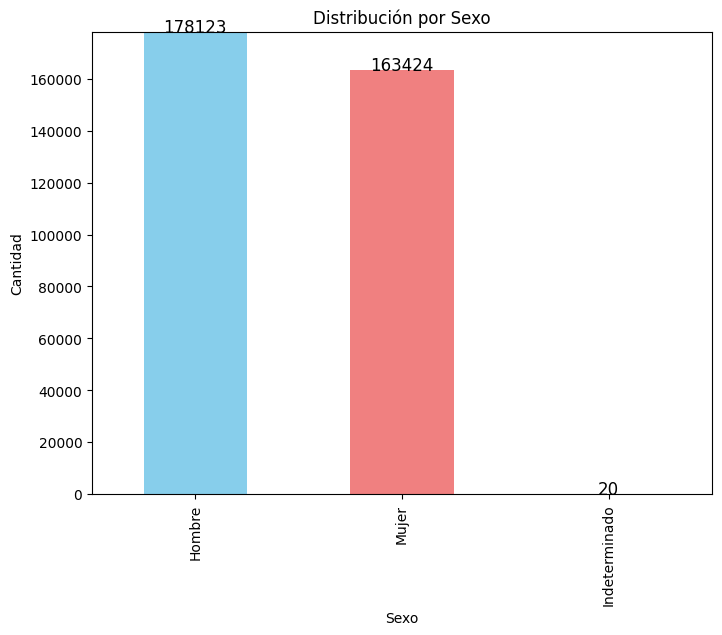

In [12]:
conteo_sexo = df['GLOSA_SEXO'].value_counts()

plt.figure(figsize=(8, 6))
barras = conteo_sexo.plot(kind='bar', color=['skyblue', 'lightcoral'])

for i, count in enumerate(conteo_sexo):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)


plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.ylim(0, conteo_sexo.max() + 10)  
plt.show()

The next chart shows the top 5 causes of death with the highest number of recorded deaths in Chile between 2022 and 2024. This visualization allows us to identify the main causes of mortality during this period and analyze potential trends or public health concerns.

C:\Users\victo\AppData\Local\Temp\ipykernel_32592\1285352821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')


Text(0.5, 1.0, 'Top 5 Enfermedades que más Muertes han Causado')

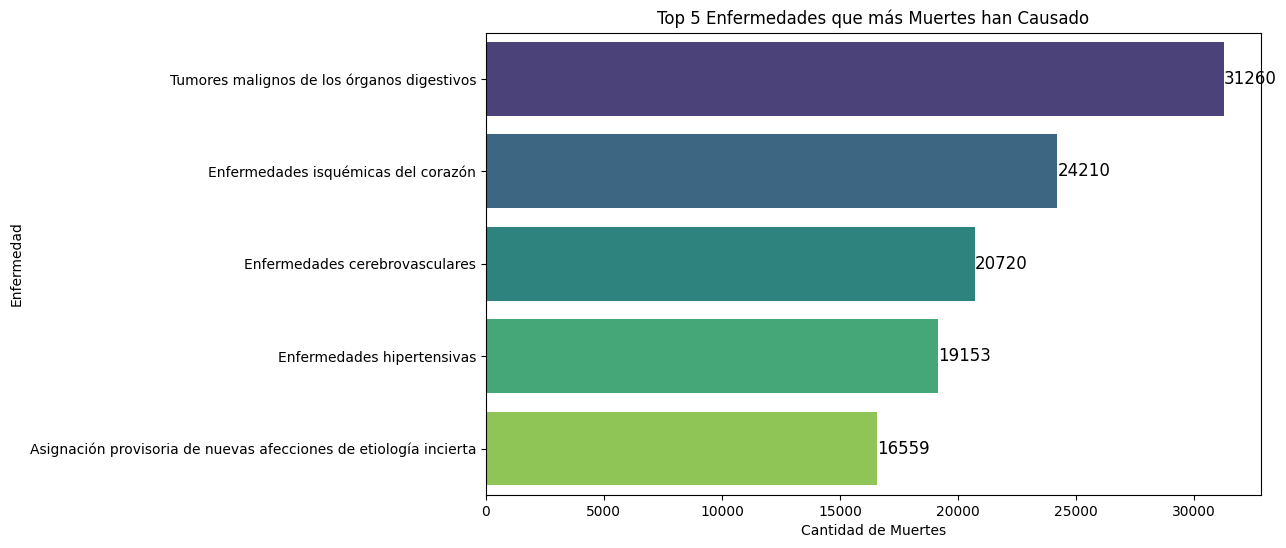

In [13]:

top_enfermedades = df['GLOSA_GRUPO_DIAG1'].value_counts().head(5) 


plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')


for i in range(len(top_enfermedades)):
    plt.text(top_enfermedades.values[i] + 0.2, i, str(top_enfermedades.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado')

We decided to split the previous chart into two:

First Chart: Shows the top causes of death in the Metropolitan Region, as its large population may influence our analysis.
Second Chart: Shows the top causes of death in the rest of Chile's regions.

As seen in the charts, the top 3 leading causes of death are consistent nationwide. However, in the Metropolitan Region, influenza appears as one of the leading causes of death, while this is not observed on a large scale in other regions. Instead, in other regions, there is a higher number of deaths under the category of "provisional assignment of new ailments of uncertain etiology," which does not occur in the Metropolitan Region.

C:\Users\victo\AppData\Local\Temp\ipykernel_32592\4197529505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades_metropolitana.values, y=top_enfermedades_metropolitana.index, palette='viridis')


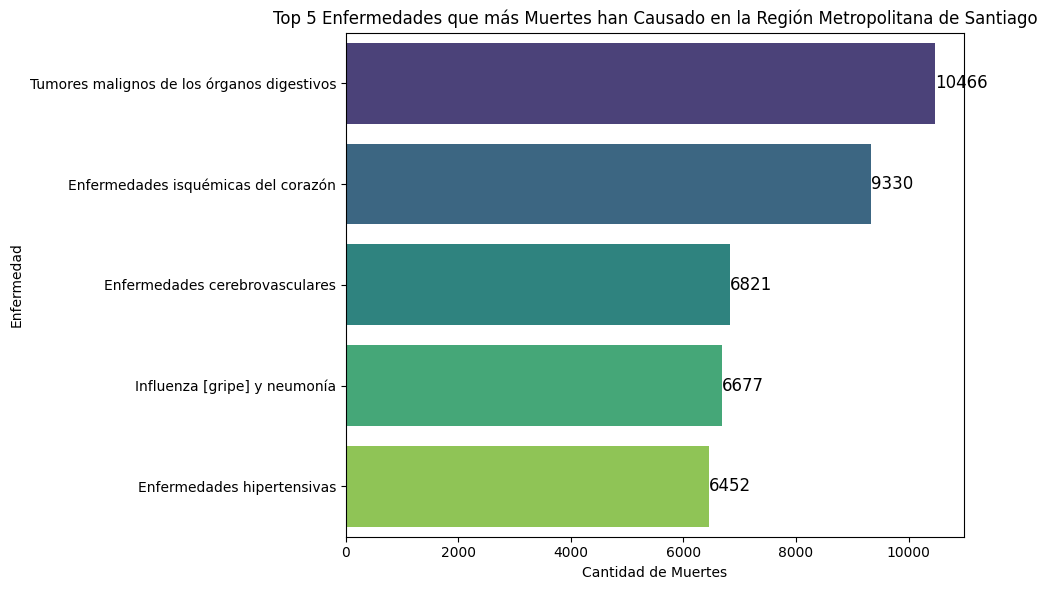

C:\Users\victo\AppData\Local\Temp\ipykernel_32592\4197529505.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades_otras_regiones.values, y=top_enfermedades_otras_regiones.index, palette='magma')


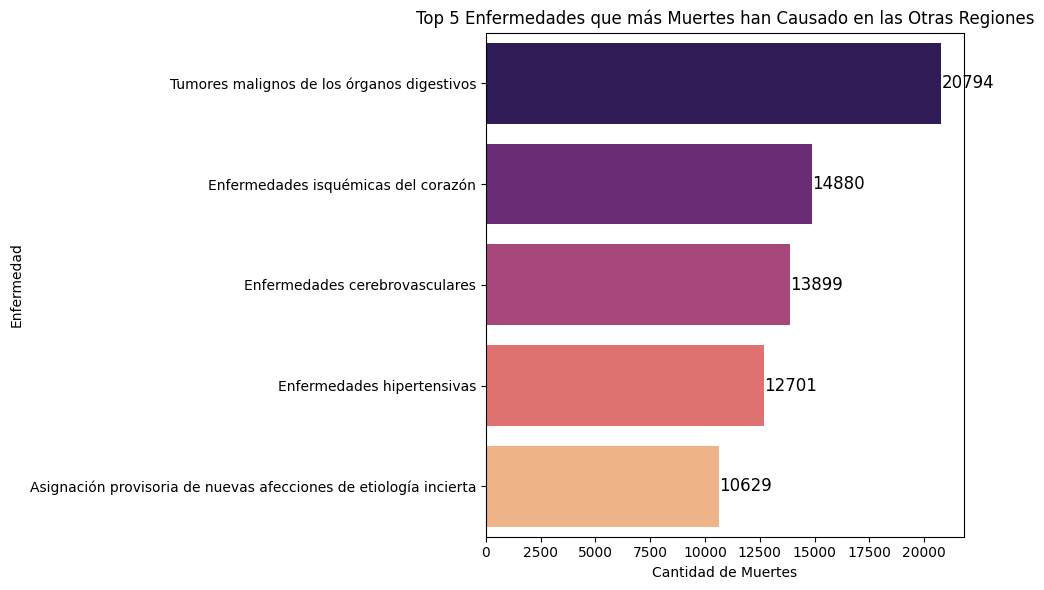

In [14]:
df_metropolitana = df[df['GLOSA_REG_RES'] == 'Metropolitana de Santiago']

top_enfermedades_metropolitana = df_metropolitana['GLOSA_GRUPO_DIAG1'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades_metropolitana.values, y=top_enfermedades_metropolitana.index, palette='viridis')

for i in range(len(top_enfermedades_metropolitana)):
    plt.text(top_enfermedades_metropolitana.values[i] + 0.2, i, str(top_enfermedades_metropolitana.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado en la Región Metropolitana de Santiago')
plt.tight_layout()

plt.show()





df_otras_regiones = df[df['GLOSA_REG_RES'] != 'Metropolitana de Santiago']

top_enfermedades_otras_regiones = df_otras_regiones['GLOSA_GRUPO_DIAG1'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades_otras_regiones.values, y=top_enfermedades_otras_regiones.index, palette='magma')

for i in range(len(top_enfermedades_otras_regiones)):
    plt.text(top_enfermedades_otras_regiones.values[i] + 0.2, i, str(top_enfermedades_otras_regiones.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado en las Otras Regiones')
plt.tight_layout()

plt.show()

We conduct an analysis of the number of deaths by each region and order them from highest to lowest by the number of deaths. This allows us to identify regions with the highest mortality rates and compare how the number of deaths varies across different areas of the country.

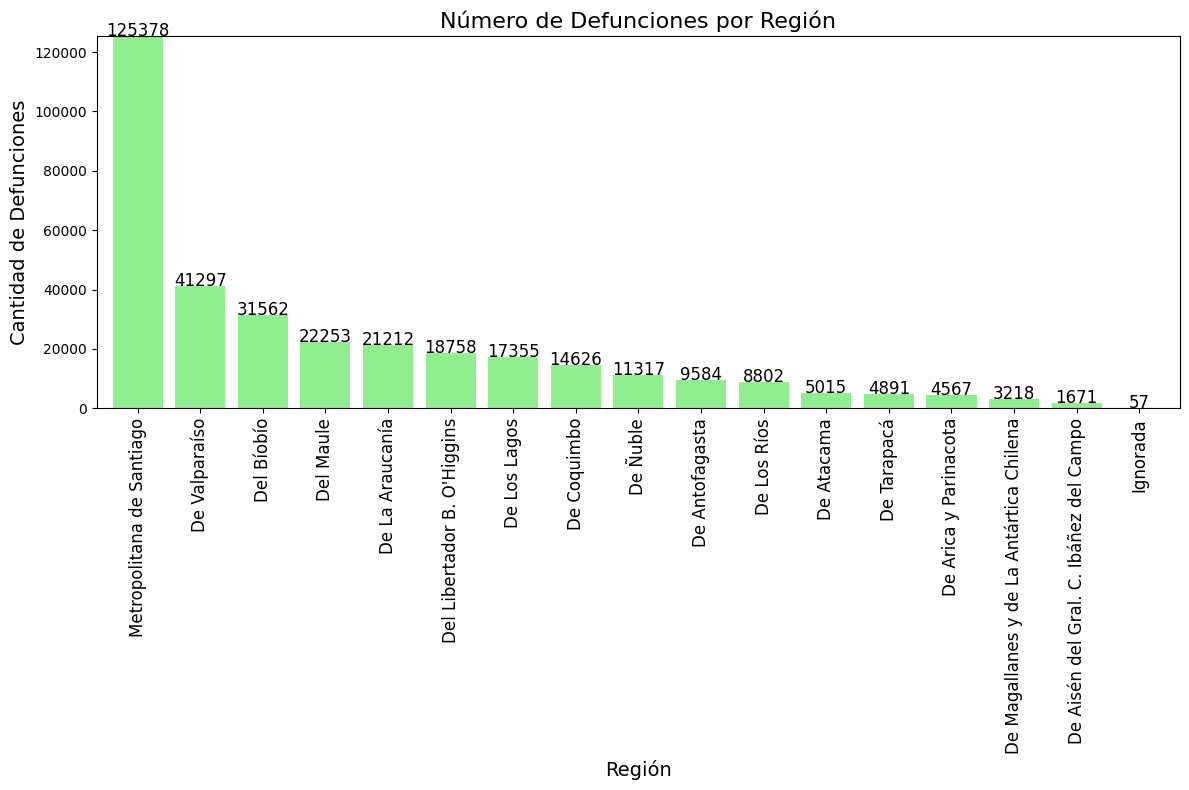

In [15]:

conteo_defunciones_region = df['GLOSA_REG_RES'].value_counts()


plt.figure(figsize=(12, 8))
barras = conteo_defunciones_region.plot(kind='bar', color='lightgreen', width=0.8)


for i, count in enumerate(conteo_defunciones_region):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)


plt.title('Número de Defunciones por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Cantidad de Defunciones', fontsize=14)
plt.ylim(0, conteo_defunciones_region.max() + 100)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()


plt.show()


The generated chart shows the age distribution at the time of death between 2022 and 2024. There is a significant peak around 80 years of age, indicating this is the most common age at death during this period. Approximately 38,000 deaths are recorded around this age, suggesting that most deaths occur in older adults.

This data is crucial for understanding the country's demographic trends and could influence public policy planning aimed at elderly care.

Additionally, we created a new column to consolidate ages into a single format, in years, as previously age was represented in four types: years, months, days, and others. Now, age is only shown in years.



C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3584441774.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.91666667 0.08333333 0.16666667 0.08333333 0.75       0.66666667
 0.16666667 0.5        0.16666667 0.08333333 0.41666667 0.08333333
 0.16666667 0.5        0.66666667 0.5        0.66666667 0.16666667
 0.08333333 0.33333333 0.16666667 0.33333333 0.41666667 0.41666667
 0.33333333 0.25       0.08333333 0.16666667 0.08333333 0.75
 0.08333333 0.25       0.16666667 0.75       0.08333333 0.08333333
 0.33333333 0.16666667 0.83333333 0.08333333 0.08333333 0.66666667
 0.08333333 0.08333333 0.91666667 0.66666667 0.41666667 0.08333333
 0.58333333 0.58333333 0.16666667 0.16666667 0.58333333 0.16666667
 0.08333333 0.08333333 0.58333333 0.33333333 0.16666667 0.16666667
 0.25       0.41666667 0.41666667 0.08333333 0.16666667 0.41666667
 0.16666667 0.16666667 0.91666667 0.16666667 0.16666667 0.33333333
 0.166

   EDAD_CANT  EDAD_TIPO  EDAD_AJUSTADA
0         73          1             73
1         71          1             71
2         61          1             61
3         19          1             19
4         77          1             77


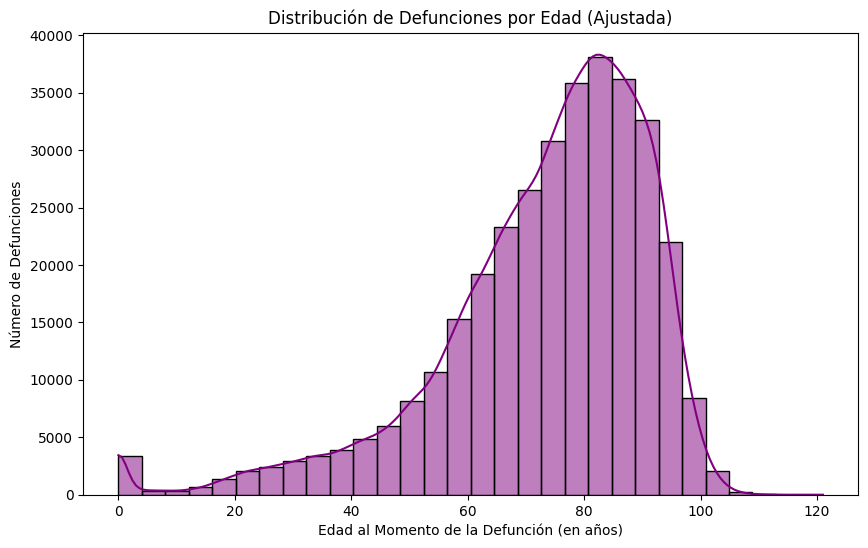

In [16]:
df['EDAD_AJUSTADA'] = df['EDAD_CANT'].copy()

df.loc[df['EDAD_TIPO'] == 2, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 12    
df.loc[df['EDAD_TIPO'] == 3, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 365   
df.loc[df['EDAD_TIPO'] == 4, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / (365 * 24)  
df.loc[df['EDAD_TIPO'] == 0, 'EDAD_AJUSTADA'] = None  

df['EDAD_AJUSTADA'] = df['EDAD_AJUSTADA'].apply(lambda x: 0 if pd.notnull(x) and x < 1 else x).astype('Int64')


print(df[['EDAD_CANT', 'EDAD_TIPO', 'EDAD_AJUSTADA']].head())

plt.figure(figsize=(10, 6))
sb.histplot(df['EDAD_AJUSTADA'].dropna(), bins=30, kde=True, color='purple')
plt.xlabel('Edad al Momento de la Defunción (en años)')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Edad (Ajustada)')
plt.show()


There are deaths with undefined residences. This code allows us to break down and visualize which of these deaths lack defined residences.

In [17]:
filas_vacias = df[df['GLOSA_COMUNA_RESIDENCIA'].isna() | (df['GLOSA_COMUNA_RESIDENCIA'] == '')]

print(filas_vacias)

       ANO_DEF   FECHA_DEF GLOSA_SEXO  EDAD_TIPO  EDAD_CANT  \
7666      2024  28-02-2024     Hombre          1         83   
29729     2024  11-04-2024     Hombre          2          1   
42733     2024  26-04-2024      Mujer          1         52   
43641     2024  26-06-2024      Mujer          2          2   

       CODIGO_COMUNA_RESIDENCIA GLOSA_COMUNA_RESIDENCIA GLOSA_REG_RES DIAG1  \
7666                        NaN                     NaN           NaN  R99X   
29729                       NaN                     NaN           NaN  R99X   
42733                       NaN                     NaN           NaN  R99X   
43641                       NaN                     NaN           NaN  R99X   

      CAPITULO_DIAG1  ... CAPITULO_DIAG2 GLOSA_CAPITULO_DIAG2  \
7666         R00-R99  ...            NaN                  NaN   
29729        R00-R99  ...            NaN                  NaN   
42733        R00-R99  ...            NaN                  NaN   
43641        R00-R99  ...   

We generate a pie chart to show the percentages of deaths for the years 2022, 2023, and 2024.

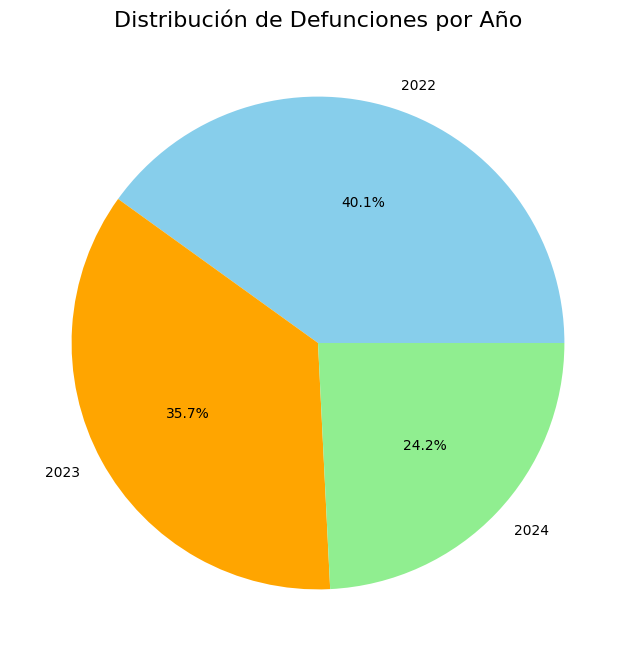

In [18]:
conteo_defunciones_ano = df['ANO_DEF'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conteo_defunciones_ano, labels=conteo_defunciones_ano.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'pink', 'yellow'])
plt.title('Distribución de Defunciones por Año', fontsize=16)
plt.show()


# FASE 3: PREPARAR LOS DATOS

Primero, eliminaremos las columnas que tienen la mayor cantidad de valores nulos. Esto es importante porque las columnas con muchos datos faltantes pueden afectar la calidad del análisis y los resultados. Al eliminarlas, nos aseguramos de trabajar con información más completa y útil.

Esta decisión fue tomada ya que estas columnas solo contienen alrededor de 20,000 datos de los más de 340,000 registros existentes, lo que representa una pequeña porción del conjunto de datos. Al tener más del 94% de sus valores faltantes, mantenerlas podría introducir ruido y dificultar la interpretación de los resultados.

In [19]:
columnas_a_eliminar = [
    'DIAG2',
    'CAPITULO_DIAG2',
    'GLOSA_CAPITULO_DIAG2',
    'CODIGO_GRUPO_DIAG2',
    'GLOSA_GRUPO_DIAG2',
    'CODIGO_CATEGORIA_DIAG2',
    'GLOSA_CATEGORIA_DIAG2',
    'CODIGO_SUBCATEGORIA_DIAG2',
    'GLOSA_SUBCATEGORIA_DIAG2',
    'CODIGO_SUBCATEGORIA_DIAG1',
    'GLOSA_SUBCATEGORIA_DIAG1',
    'DIAG1',
    'CAPITULO_DIAG1',
    'CODIGO_GRUPO_DIAG1',	
    'CODIGO_CATEGORIA_DIAG1',	
    'GLOSA_CATEGORIA_DIAG1'
]

df = df.drop(columns=columnas_a_eliminar, axis=1, errors='ignore')



Convertiremos las regiones a un formato numérico para facilitar su manejo en futuros análisis. Esto simplifica los cálculos y permite realizar operaciones matemáticas o estadísticas de manera más eficiente.

In [20]:
region_map = {
    'Metropolitana de Santiago': 13,
    'De Valparaíso': 5,
    'Del Bíobío': 8,
    'Del Maule': 7,
    'De La Araucanía': 9,
    'De Los Lagos': 10,
    "Del Libertador B. O'Higgins": 6,  
    'De Coquimbo': 4,
    'De Ñuble': 16,
    'De Antofagasta': 2,
    'De Los Ríos': 14,
    'De Atacama': 3,
    'De Tarapacá': 1,
    'De Arica y Parinacota': 15,
    'De Magallanes y de La Antártica Chilena': 12,
    'De Aisén del Gral. C. Ibáñez del Campo': 11,
    'Ignorada': 99
}


df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].map(region_map)

Pasaremos la columna lugar de defuncion a tipo numerico y quedaria asi:

Casa habitación = 1 \
Hospital o Clínica = 2 \
Otro = 3

In [21]:
lugar_defuncion_mapping = {
    'Casa habitación': 1,
    'Hospital o Clínica': 2,
    'Otro': 3
}

df['LUGAR_DEFUNCION'] = df['LUGAR_DEFUNCION'].map(lugar_defuncion_mapping)

In [22]:
import pandas as pd

df = df[df['LUGAR_DEFUNCION'] != 3]

Por otro lado manejaremos la columna GLOSA_CAPITULO_DIAG1 con numeros, esto es basicamente para poder manejar de mejor manera los datos y muy necesario ya que es nuestro target del proyecto.

Quedaria tal que así:

Ciertas afecciones originadas en el período perinatal = 0 \
Ciertas enfermedades infecciosas y parasitarias = 1 \
Códigos para propósitos especiales = 2 \
Embarazo, parto y puerperio = 3 \
Enfermedades de la piel y del tejido subcutáneo = 4 \
Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad = 5 \
Enfermedades del ojo y sus anexos = 6 \
Enfermedades del oído y de la apófisis mastoides = 7 \
Enfermedades del sistema circulatorio = 8 \
Enfermedades del sistema digestivo = 9 \
Enfermedades del sistema genitourinario = 10 \
Enfermedades del sistema nervioso central = 11 \
Enfermedades del sistema osteomuscular y del tejido conjuntivo = 12 \
Enfermedades del sistema respiratorio = 13 \
Enfermedades endocrinas, nutricionales y metabólicas = 14 \
Malformaciones congénitas, deformidades y anomalías cromosómicas = 15 \
Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte = 16 \
Trastornos mentales y del comportamiento = 17 \
Traumatismos, envenenamientos y algunas otras consecuencias de causas externas = 18 \
Tumores [Neoplasias] = 19 \

In [23]:
from sklearn.preprocessing import LabelEncoder

le_diag = LabelEncoder()
df['DIAG1_encoded'] = le_diag.fit_transform(df['GLOSA_CAPITULO_DIAG1'].astype(str))

Repetiremos el proceso anterior y ahora codificaremos la columna GLOSA_GRUPO_DIAG1 la cual es nuestro target, para asi poder trabajar con esta variable a futuro de mejor manera.

In [51]:
from sklearn.preprocessing import LabelEncoder

le_diag = LabelEncoder()
df['GRUPO_DIAG1_ENCODED'] = le_diag.fit_transform(df['GLOSA_GRUPO_DIAG1'].astype(str))

Así quedaria el glosario de la columna GLOSA_GRUPO_DIAG1:

In [78]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None) 


clases_unicas = df['GLOSA_GRUPO_DIAG1'].unique()


clases_df = pd.DataFrame(clases_unicas, columns=['Clases'])


print(clases_df)


                                                                                                                       Clases
0                                                                       Otras enfermedades degenerativas del sistema nervioso
1                                                                                      Otras formas de enfermedad del corazón
2                                                                                         Enfermedades isquémicas del corazón
3                                                                                                Influenza [gripe] y neumonía
4                                                                                                    Tumor maligno de la mama
5                                                                                       Trastornos episódicos y paroxísticos 
6                                                                           Causas de mortalidad mal definidas y desco

Procederemos a cambiar los datos que tienen como valor Ignorada (99) y datos nulos en nuestra variable GLOSA_REG_RES, asignandole el valor de la media y moda segun corresponda tanto para la columna analizada ateriormente GLOSA_REG_RES y las variables que se relacionan directamente con esta CODIGO_COMUNA_RESIDENCIA y GLOSA_COMUNA_RESIDENCIA

In [25]:
media_codigo_comuna = int(df['CODIGO_COMUNA_RESIDENCIA'].mode())
df['CODIGO_COMUNA_RESIDENCIA'].fillna(media_codigo_comuna, inplace=True) 

media_glosa_reg_res = int(df['GLOSA_REG_RES'].mode())
df['GLOSA_REG_RES'].fillna(media_glosa_reg_res, inplace=True) 

moda_comuna = df['GLOSA_COMUNA_RESIDENCIA'].mode()[0]
df['GLOSA_COMUNA_RESIDENCIA'].fillna(moda_comuna, inplace=True) 

C:\Users\victo\AppData\Local\Temp\ipykernel_32592\2911162843.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  media_codigo_comuna = int(df['CODIGO_COMUNA_RESIDENCIA'].mode())
C:\Users\victo\AppData\Local\Temp\ipykernel_32592\2911162843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CODIGO_COMUNA_RESIDENCIA'].fillna(media_codigo_comuna, inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_32592\2911162843.py:4: Future

Las variables CODIGO_COMUNA_RESIDENCIA y GLOSA_REG_RES son de tipo Float64. Las convertiremos a tipo int para facilitar el manejo de los valores faltantes (missing values).

In [26]:
df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].fillna(0)
df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].astype(int)

df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].fillna(0)
df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].astype(int)

Detectamos los valores atípicos (aquellos que se encuentran muy alejados de la mayoría de los datos) en la columna GLOSA_REG_RES (Regiones de Chile) y las variables relacionadas, como por ejemplo algunas defunciones no contienen la localidad de esta y pertenecen a una región y comuna indefinida. Estos valores extremos pueden distorsionar nuestros resultados y generar confusión en el análisis. Por eso, decidimos eliminarlos para asegurarnos de que nuestra investigación se base en información más representativa y confiable. Esto nos ayudará a obtener conclusiones más precisas.

Podemos observar que el outlier (valor atípico) cercano a 100 corresponde a la región 'Ignorada', que se identifica con el valor 99. Este outlier cuenta con solo 57 registros, la cual se le designa a las defunciones las cuales no se registra este tipo de informacion, lo que lo aleja significativamente de las cifras de las demás regiones.

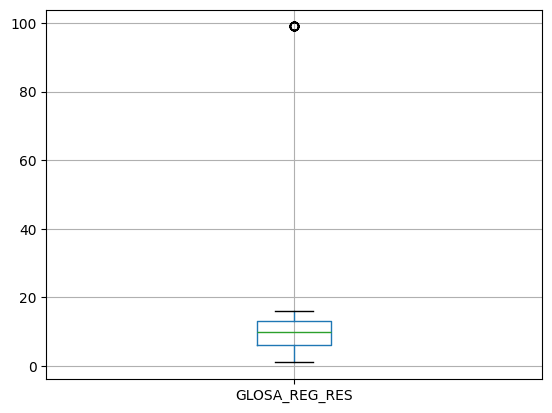

In [27]:
import matplotlib.pyplot as plt

df.boxplot(column=['GLOSA_REG_RES'])
plt.show()

Procederemos a reemplazar los datos con el valor 'Ignorada' (99) y los datos nulos en la variable GLOSA_REG_RES, asignándoles el valor de la media o la moda, según corresponda. Esto se aplicará tanto a la columna GLOSA_REG_RES como a las variables relacionadas, CODIGO_COMUNA_RESIDENCIA y GLOSA_COMUNA_RESIDENCIA.

Dado que la cantidad de datos atípicos es muy reducida, asignarles la media o la moda de su columna no tendría significado en nuestro análisis.

In [28]:
moda_codigo_comuna = df['CODIGO_COMUNA_RESIDENCIA'].mode()[0]
df['CODIGO_COMUNA_RESIDENCIA'].replace(99999, moda_codigo_comuna, inplace=True)  


moda_glosa_reg_res = df['GLOSA_REG_RES'].mode()[0]
df['GLOSA_REG_RES'].replace(99, moda_glosa_reg_res, inplace=True)


moda_comuna = df['GLOSA_COMUNA_RESIDENCIA'].mode()[0]
df['GLOSA_COMUNA_RESIDENCIA'].replace('Ignorada', moda_comuna, inplace=True) 

C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3337907571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CODIGO_COMUNA_RESIDENCIA'].replace(99999, moda_codigo_comuna, inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3337907571.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

Convertiremos los datos de la columna GLOSA_SEXO a tipo entero para facilitar el trabajo con estos datos en el futuro. La codificación será la siguiente:

Hombre = 1 \
Mujer = 2 \
Indefinido = 3 \

In [29]:
df['GLOSA_SEXO'] = df['GLOSA_SEXO'].map({
    'Hombre': 1,
    'Mujer': 2,
    'Indeterminado': 3
})

print(df['GLOSA_SEXO'].head())

0    2
1    1
2    1
4    1
5    2
Name: GLOSA_SEXO, dtype: int64


Borraremos los datos que contengan GLOSA_SEXO=3 (otro) ya que tiene menor cantidad en cuanto a los demas sexo y ademas no nos aporta una informacion relevante hacia nuestro proyecto.

In [30]:
import pandas as pd

df = df[df['GLOSA_SEXO'] != 3]

Los códigos en la columna CODIGO_COMUNA_RESIDENCIA están en formato float64 (números que pueden tener decimales), pero como todos terminan con ".0", no es necesario mantener este formato. Por eso, decidimos convertirlos a formato int (entero), ya que todos los valores son números enteros sin parte decimal. Esto simplifica el manejo de los datos y los hace más claros.

In [31]:
df.dtypes

ANO_DEF                      int64
FECHA_DEF                   object
GLOSA_SEXO                   int64
EDAD_TIPO                    int64
EDAD_CANT                    int64
CODIGO_COMUNA_RESIDENCIA     int64
GLOSA_COMUNA_RESIDENCIA     object
GLOSA_REG_RES                int64
GLOSA_CAPITULO_DIAG1        object
GLOSA_GRUPO_DIAG1           object
LUGAR_DEFUNCION              int64
EDAD_AJUSTADA                Int64
DIAG1_encoded                int64
GRUPO_DIAG1_ENCODED          int64
dtype: object

Pasaremos la todos los valores de la columna EDAD_TIPO a 1 (edad en años) ya que de ahora en adelante solo consideraremos las edades de las personas solamente en formato de años.

In [32]:
df['EDAD_TIPO'] = 1

print(df['EDAD_TIPO'].head())

0    1
1    1
2    1
4    1
5    1
Name: EDAD_TIPO, dtype: int64


Calculamos las estadísticas descriptivas de las edades en años utilizando la columna edad_en_anios del DataFrame. Primero, extraemos los valores de edad convertidos a años. Luego, utilizamos las funciones de NumPy para calcular tres medidas importantes: la media, la mediana y la desviación estándar de estas edades. La media nos indica la edad promedio de los fallecidos, lo que nos da una idea general de la distribución de edades. La mediana representa la edad que divide a la población en dos mitades.La desviación estándar mide la variabilidad de las edades; un valor alto sugiere que hay una amplia gama de edades entre los fallecidos, mientras que un valor bajo indica que las edades están más agrupadas alrededor de la media. Finalmente, imprimimos estos resultados para entender mejor la distribución de las edades en el conjunto de datos.

In [33]:
edades = df['EDAD_AJUSTADA']  

media_edad = np.mean(edades)
mediana_edad = np.median(edades)
desviacion_estandar = np.std(edades)

print(f"Media de edad: {media_edad:.2f} años")
print(f"Mediana de edad: {mediana_edad:.2f} años")
print(f"Desviación estándar de la edad: {desviacion_estandar:.2f} años")

Media de edad: 74.80 años
Mediana de edad: nan años
Desviación estándar de la edad: 17.01 años


In [34]:
df = df.dropna(subset=['EDAD_AJUSTADA'])

Procederemos a estandarizar la variable EDAD_CANT para facilitar la comparación con las demás variables y mejorar el rendimiento de nuestros futuros algoritmos. A partir de ahora, las edades estarán expresadas en relación con su media, lo que nos permitirá entender mejor cómo se comporta esta variable en conjunto con el resto del conjunto de datos.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['EDAD_CANT'] = scaler.fit_transform(df[['EDAD_CANT']])

Ahora aplicaremos metricas para balancear las clases importantes que utilizaremos para trabajar en los modelos y en nuestro target.

Instalamos la herramienta la cual nos permite balancear las clases.

In [36]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Realizamos el balanceo para las columnas LUGAR_DEFUNCION y GLOSA_SEXO, las cuales quedaran con la misma cantidad de datos entre sus clases, ya que no se permite realizar incrementos de datos a diferentes clases por separado, ya que no se podria tener la misma cantidad de datos para las 2 clases.

In [37]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df.drop(columns=['LUGAR_DEFUNCION', 'GLOSA_SEXO']) 


df['LUGAR_SEXO_COMBINADO'] = df['LUGAR_DEFUNCION'].astype(str) + '_' + df['GLOSA_SEXO'].astype(str)
y = df['LUGAR_SEXO_COMBINADO']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

y_resampled = y_resampled.str.split('_', expand=True)
y_resampled.columns = ['LUGAR_DEFUNCION', 'GLOSA_SEXO']


df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print(df_resampled['LUGAR_DEFUNCION'].value_counts())
print(df_resampled['GLOSA_SEXO'].value_counts())


LUGAR_DEFUNCION
1    180118
2    180118
Name: count, dtype: int64
GLOSA_SEXO
2    180118
1    180118
Name: count, dtype: int64


Decidimos crear tres pipelines para automatizar nuestros procesos en el futuro. 
Para ejecutar los pipelines, debemos correr los comandos en la consola, estando posicionados en la carpeta del proyecto.

-Pipeline 1: sexo_int()

Función: Convierte los valores de la columna GLOSA_SEXO a datos numéricos.
Comando para correrlo: kedro run --pipeline 1


-Pipeline 2: lugar_defunciones()

Función: Convierte los valores de la columna LUGAR_DEFUNCION a datos numéricos.
Comando para correrlo: kedro run --pipeline 2


-Pipeline 3: eliminar_columnas()

Función: Elimina las columnas que contienen la mayor cantidad de datos nulos.
Comando para correrlo: kedro run --pipeline 3


# CONCLUSIONES FASE 1, 2 Y 3

La Región Metropolitana de Santiago destaca significativamente con 125,378 defunciones, superando por mucho a las demás regiones. Esto podría explicarse por la densidad de población en la capital, ya que es la región más poblada del país.

Valparaíso y Biobío también presentan un número considerable de defunciones con 41,297 y 31,562 respectivamente, lo cual es esperable debido a su población relativamente alta. Por otro lado, las regiones más extremas y menos pobladas, como Aysén y Magallanes, muestran un número de defunciones significativamente menor, con cifras de 1,671 y 3,218 respectivamente.

Tumores malignos de los órganos digestivos son la principal causa de muerte, con 31,260 fallecimientos. Este dato resalta la importancia del cáncer, específicamente en los órganos digestivos, como un importante desafío de salud pública en Chile.

Las enfermedades isquémicas del corazón ocupan el segundo lugar, con 24,210 muertes. Estas enfermedades son típicas de países con hábitos de vida occidentales, asociados con una dieta rica en grasas y factores de riesgo como la hipertensión y el tabaquismo.

En tercer lugar, las enfermedades cerebrovasculares han provocado 20,720 muertes, lo que sugiere que tanto los problemas circulatorios como los accidentes cerebrovasculares son una preocupación importante en el país.

Las enfermedades hipertensivas están también dentro de las principales causas, con 19,153 fallecimientos, lo que subraya el impacto de la hipertensión arterial en la mortalidad general.

Por último, aparece la categoría de asignación provisoria de nuevas afecciones de etiología incierta, con 16,559 muertes. Este es un grupo que puede incluir muertes por causas no completamente comprendidas o enfermedades emergentes que requieren más investigación.

## FASE 4: MODELAMIENTO

Antes de avanzar a las siguientes fases, procederemos a dividir nuestro dataset en dos partes. La primera contendrá toda la información exclusivamente de la Región Metropolitana, mientras que la segunda incluirá los datos de las demás regiones, excluyendo la Región Metropolitana.

Esta decisión se ha tomado debido a la notable diferencia en la cantidad de datos entre la Región Metropolitana y el resto de las regiones. Esta separación nos permitirá comprender mejor los datos y obtener resultados más precisos en nuestros modelos.

In [38]:
df_region_13 = df_resampled[df_resampled['GLOSA_REG_RES'] == 13]

df_otras_regiones = df_resampled[df_resampled['GLOSA_REG_RES'] != 13]

### MODELOS DE REGRESION 

#### MODELO 1: ENTRENAMIENTO REGRESIÓN LINEAL

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']


def train_and_evaluate_model(df):
    X = df[features]
    y = df['GRUPO_DIAG1_ENCODED']  


    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train, y_train)


    y_pred_train = lin_reg_model.predict(X_train)
    y_pred_test = lin_reg_model.predict(X_test)


    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    return train_r2, test_r2


train_r2_region_13, test_r2_region_13 = train_and_evaluate_model(df_region_13)


train_r2_otras_regiones, test_r2_otras_regiones = train_and_evaluate_model(df_otras_regiones)


print(f'R^2 Set de Entrenamiento - Región Metropolitana: {train_r2_region_13}')
print(f'R^2 Set de Prueba - Región Metropolitana: {test_r2_region_13}')

print(f'R^2 Set de Entrenamiento - Otras Regiones: {train_r2_otras_regiones}')
print(f'R^2 Set de Prueba - Otras Regiones: {test_r2_otras_regiones}')


R^2 Set de Entrenamiento - Región Metropolitana: 0.5529939068816404
R^2 Set de Prueba - Región Metropolitana: 0.55385725570194
R^2 Set de Entrenamiento - Otras Regiones: 0.5215313591875406
R^2 Set de Prueba - Otras Regiones: 0.5182288599500278


El rendimiento del modelo es ligeramente mejor en la Región Metropolitana que en las otras regiones, aunque la diferencia no es muy significativa (alrededor del 3-4% en el valor de 
𝑅
2
R 
2
 ). Esto podría deberse a características más homogéneas o patrones más fuertes en los datos de la Región Metropolitana en comparación con las otras regiones.

#### MODELO 2: ENTRENAMIENTO SUPPORT VECTOR MACHINE

In [40]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_and_evaluate_svm(df):

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    svr_rbf = SVR(kernel='rbf')
    param_grid = {
        'C': [1, 10],
        'gamma': [0.01, 0.1]
    }


    X_train_subset = X_train_scaled[:500] 
    y_train_subset = y_train[:500]


    grid_search = GridSearchCV(svr_rbf, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_subset, y_train_subset)


    best_svr = grid_search.best_estimator_


    y_pred_rbf_train = best_svr.predict(X_train_scaled)
    y_pred_rbf_test = best_svr.predict(X_test_scaled)

    r2_rbf_train = r2_score(y_train, y_pred_rbf_train)
    r2_rbf_test = r2_score(y_test, y_pred_rbf_test)

    return grid_search.best_params_, r2_rbf_train, r2_rbf_test


best_params_region_13, r2_train_region_13, r2_test_region_13 = train_and_evaluate_svm(df_region_13)


best_params_otras_regiones, r2_train_otras_regiones, r2_test_otras_regiones = train_and_evaluate_svm(df_otras_regiones)


print(f'R^2 Set de Entrenamiento - Modelo SVM - Región Metropolitana: {r2_train_region_13}')
print(f'R^2 Set de Prueba - Modelo SVM - Región Metropolitana: {r2_test_region_13}')

print(f'R^2 Set de Entrenamiento - Modelo SVM - Otras Regiones: {r2_train_otras_regiones}')
print(f'R^2 Set de Prueba - Modelo SVM - Otras Regiones: {r2_test_otras_regiones}')


R^2 Set de Entrenamiento - Modelo SVM - Región Metropolitana: 0.6181707063287387
R^2 Set de Prueba - Modelo SVM - Región Metropolitana: 0.6233723100427901
R^2 Set de Entrenamiento - Modelo SVM - Otras Regiones: 0.5677410865498759
R^2 Set de Prueba - Modelo SVM - Otras Regiones: 0.5627333084847688


El rendimiento es mejor en la Región Metropolitana que en las Otras Regiones, lo que podría sugerir que los datos de la Región Metropolitana tienen patrones más fuertes o más consistentes que los del resto del país, donde la variabilidad es mayor o los patrones son más complejos de capturar.

#### MODELO 3: ENTRENAMIENTO ARBOL DE DESCICION DE REGRESIÓN

In [41]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_and_evaluate_decision_tree(df):

    imputer = SimpleImputer(strategy='mean')
    

    X = df[features]
    y = df[target]


    X_imputed = imputer.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


    tree_model = DecisionTreeRegressor(
        random_state=42,
        max_depth=10,             
        min_samples_split=10,       
        min_samples_leaf=5,        
        max_features='sqrt'         
    )
    
    tree_model.fit(X_train, y_train)


    y_pred_train_tree = tree_model.predict(X_train)
    y_pred_test_tree = tree_model.predict(X_test)


    train_r2_tree = r2_score(y_train, y_pred_train_tree)
    test_r2_tree = r2_score(y_test, y_pred_test_tree)

    return train_r2_tree, test_r2_tree


train_r2_region_13, test_r2_region_13 = train_and_evaluate_decision_tree(df_region_13)


train_r2_otras_regiones, test_r2_otras_regiones = train_and_evaluate_decision_tree(df_otras_regiones)


print(f'R^2 Set de Entrenamiento - Modelo Árbol de Decisión - Región Metropolitana: {train_r2_region_13}')
print(f'R^2 Set de Prueba - Modelo Árbol de Decisión - Región Metropolitana: {test_r2_region_13}')

print(f'R^2 Set de Entrenamiento - Modelo Árbol de Decisión - Otras Regiones: {train_r2_otras_regiones}')
print(f'R^2 Set de Prueba - Modelo Árbol de Decisión - Otras Regiones: {test_r2_otras_regiones}')


R^2 Set de Entrenamiento - Modelo Árbol de Decisión - Región Metropolitana: 0.8147290590565647
R^2 Set de Prueba - Modelo Árbol de Decisión - Región Metropolitana: 0.8062762361069664
R^2 Set de Entrenamiento - Modelo Árbol de Decisión - Otras Regiones: 0.7840961994868533
R^2 Set de Prueba - Modelo Árbol de Decisión - Otras Regiones: 0.7785727783946057


Inicialmente, se probó el modelo de Árbol de Decisión sin regularización, lo que generó overfitting. Los resultados fueron:

Región Metropolitana: 
𝑅
2
R 
2
  Entrenamiento: 0.839, 
𝑅
2
R 
2
  Prueba: 0.807
Otras Regiones: 
𝑅
2
R 
2
  Entrenamiento: 0.877, 
𝑅
2
R 
2
  Prueba: 0.766
Luego, se aplicaron hiperparámetros de regularización, lo que mejoró la generalización del modelo:

Región Metropolitana: 
𝑅
2
R 
2
  Entrenamiento: 0.815, 
𝑅
2
R 
2
  Prueba: 0.806
Otras Regiones: 
𝑅
2
R 
2
  Entrenamiento: 0.784, 
𝑅
2
R 
2
  Prueba: 0.779

Aunque el rendimiento en el conjunto de entrenamiento ha disminuido ligeramente (en comparación con los árboles sin regularización), esto es un signo positivo porque significa que el modelo no está sobreajustando los datos.

### MODELOS DE CLASIFICACIÓN

#### MODELO 1: ENTRENAMIENTO GRADIENT BOOSTING CLASIFICACIóN

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_and_evaluate_gradient_boosting(df):

    for feature in features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

    X = df[features]
    y = df[target]


    df_sampled = df.sample(frac=0.1, random_state=42)
    X_sampled = df_sampled[features]
    y_sampled = df_sampled[target]


    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train, y_train)


    r2_train = r2_score(y_train, gb_model.predict(X_train))
    r2_test = r2_score(y_test, gb_model.predict(X_test))

    return r2_train, r2_test


r2_train_region_13, r2_test_region_13 = train_and_evaluate_gradient_boosting(df_region_13)


r2_train_otras_regiones, r2_test_otras_regiones = train_and_evaluate_gradient_boosting(df_otras_regiones)


print(f'R^2 Set de Entrenamiento - Modelo Gradient Boosting - Región Metropolitana: {r2_train_region_13}')
print(f'R^2 Set de Prueba - Modelo Gradient Boosting - Región Metropolitana: {r2_test_region_13}')

print(f'R^2 Set de Entrenamiento - Modelo Gradient Boosting - Otras Regiones: {r2_train_otras_regiones}')
print(f'R^2 Set de Prueba - Modelo Gradient Boosting - Otras Regiones: {r2_test_otras_regiones}')

C:\Users\victo\AppData\Local\Temp\ipykernel_32592\4080632741.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
C:\Users\victo\AppData\Local\Temp\ipykernel_32592\4080632741.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')


R^2 Set de Entrenamiento - Modelo Gradient Boosting - Región Metropolitana: 0.4675569919921022
R^2 Set de Prueba - Modelo Gradient Boosting - Región Metropolitana: 0.4651018299823825
R^2 Set de Entrenamiento - Modelo Gradient Boosting - Otras Regiones: 0.6634030815874075
R^2 Set de Prueba - Modelo Gradient Boosting - Otras Regiones: 0.628470901199949


Región Metropolitana: El rendimiento del modelo es relativamente bajo, explicando menos del 50% de la variabilidad tanto en los conjuntos de entrenamiento como de prueba. Esto sugiere que el modelo podría estar teniendo dificultades para capturar patrones significativos en los datos de esta región.

Otras Regiones: El modelo tiene un mejor desempeño en las otras regiones, donde explica una mayor proporción de la variabilidad. Esto podría deberse a que los patrones en los datos de estas regiones son más consistentes o fáciles de capturar.

#### MODELO 2: ENTRENAMIENTO REGRESIÓN LOGISTICA

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


for feature in features:
    df_region_13[feature] = pd.to_numeric(df_region_13[feature], errors='coerce')
    df_otras_regiones[feature] = pd.to_numeric(df_otras_regiones[feature], errors='coerce')


def train_and_evaluate_logistic_regression(df):

    df_sampled = df.sample(frac=0.1, random_state=42)
    X_sampled = df_sampled[features]
    y_sampled = df_sampled[target]


    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
    log_reg_model.fit(X_train, y_train)


    y_train_pred = log_reg_model.predict(X_train)
    y_test_pred = log_reg_model.predict(X_test)


    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return r2_train, r2_test


print("Evaluando el modelo para la Región Metropolitana:")
r2_train_region_13, r2_test_region_13 = train_and_evaluate_logistic_regression(df_region_13)


print(f'R² Set de Entrenamiento - Región Metropolitana: {r2_train_region_13}')
print(f'R² Set de Prueba - Región Metropolitana: {r2_test_region_13}')



print("\nEvaluando el modelo para Otras Regiones:")
r2_train_otras_regiones, r2_test_otras_regiones = train_and_evaluate_logistic_regression(df_otras_regiones)


print(f'R² Set de Entrenamiento - Otras Regiones: {r2_train_otras_regiones}')
print(f'R² Set de Prueba - Otras Regiones: {r2_test_otras_regiones}')


Evaluando el modelo para la Región Metropolitana:


C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3658514497.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_13[feature] = pd.to_numeric(df_region_13[feature], errors='coerce')
C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3658514497.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_otras_regiones[feature] = pd.to_numeric(df_otras_regiones[feature], errors='coerce')


R² Set de Entrenamiento - Región Metropolitana: 0.6502796143968802
R² Set de Prueba - Región Metropolitana: 0.6609151345547292

Evaluando el modelo para Otras Regiones:
R² Set de Entrenamiento - Otras Regiones: 0.5818969946835753
R² Set de Prueba - Otras Regiones: 0.6130666298233055


Región Metropolitana: El rendimiento es sólido, con el modelo explicando más del 65% de la variabilidad tanto en el conjunto de entrenamiento como en el de prueba. El hecho de que los valores de 
𝑅
2
R 
2
  sean tan cercanos indica que el modelo generaliza bien en esta región.

Otras Regiones: Aunque el rendimiento es ligeramente más bajo que en la Región Metropolitana, con el modelo explicando alrededor del 61.3% de la variabilidad en el conjunto de prueba, sigue siendo un buen resultado. Esto sugiere que, aunque hay más variabilidad en los datos de las otras regiones, el modelo todavía es capaz de capturar patrones significativos.

#### MODELO 3: ENTRENAMIENTO RANDOM FOREST CLASSIFIER

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


for feature in features:
    df_region_13[feature] = pd.to_numeric(df_region_13[feature], errors='coerce')
    df_otras_regiones[feature] = pd.to_numeric(df_otras_regiones[feature], errors='coerce')


def train_and_evaluate_random_forest(df):
    

    df_sampled = df.sample(frac=0.1, random_state=42)
    X_sampled = df_sampled[features]
    y_sampled = df_sampled[target]


    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    rf_model = RandomForestClassifier(
        random_state=42,
        max_depth=10,              
        min_samples_leaf=5,        
        max_features='sqrt',       
        n_estimators=100          
    )
    rf_model.fit(X_train, y_train)


    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)


    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return r2_train, r2_test


print("Evaluando el modelo Random Forest para la Región Metropolitana:")
r2_train_region_13, r2_test_region_13 = train_and_evaluate_random_forest(df_region_13)


print(f'R² Set de Entrenamiento - Región Metropolitana: {r2_train_region_13}')
print(f'R² Set de Prueba - Región Metropolitana: {r2_test_region_13}')



print("\nEvaluando el modelo Random Forest para Otras Regiones:")
r2_train_otras_regiones, r2_test_otras_regiones = train_and_evaluate_random_forest(df_otras_regiones)


print(f'R² Set de Entrenamiento - Otras Regiones: {r2_train_otras_regiones}')
print(f'R² Set de Prueba - Otras Regiones: {r2_test_otras_regiones}')


Evaluando el modelo Random Forest para la Región Metropolitana:


C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3135736151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_13[feature] = pd.to_numeric(df_region_13[feature], errors='coerce')
C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3135736151.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_otras_regiones[feature] = pd.to_numeric(df_otras_regiones[feature], errors='coerce')


R² Set de Entrenamiento - Región Metropolitana: 0.7778272182966165
R² Set de Prueba - Región Metropolitana: 0.7487591537548051

Evaluando el modelo Random Forest para Otras Regiones:
R² Set de Entrenamiento - Otras Regiones: 0.7346912666565331
R² Set de Prueba - Otras Regiones: 0.7157809770069845


Inicialmente, el modelo de Random Forest Classifier sin hiperparámetros mostró signos de overfitting:

Región Metropolitana: 
𝑅
2
R 
2
  en entrenamiento: 0.826, en prueba: 0.709.
Otras Regiones: 
𝑅
2
R 
2
  en entrenamiento: 0.904, en prueba: 0.654.
El modelo ajustaba bien en los datos de entrenamiento pero no generalizaba correctamente en los datos de prueba, especialmente en las Otras Regiones, donde la diferencia entre los conjuntos era considerable.

Después de ajustar los hiperparámetros para reducir el overfitting, los resultados mejoraron:

Región Metropolitana: 
𝑅
2
R 
2
  en entrenamiento: 0.778, en prueba: 0.749.
Otras Regiones: 
𝑅
2
R 
2
  en entrenamiento: 0.735, en prueba: 0.716.
Los ajustes lograron equilibrar el rendimiento del modelo, reduciendo la diferencia entre los conjuntos de entrenamiento y prueba, mejorando la generalización y capturando patrones más consistentes en los datos.

## FASE 5: EVALUACIÓN

### MODELOS DE REGRESIÓN

#### MODELO 1: EVALUCIAÓN REGRESION LINEAL

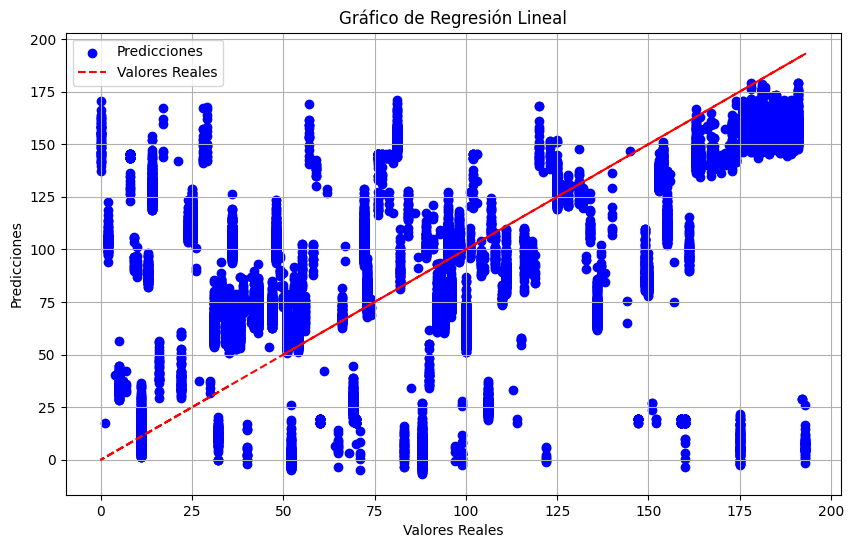

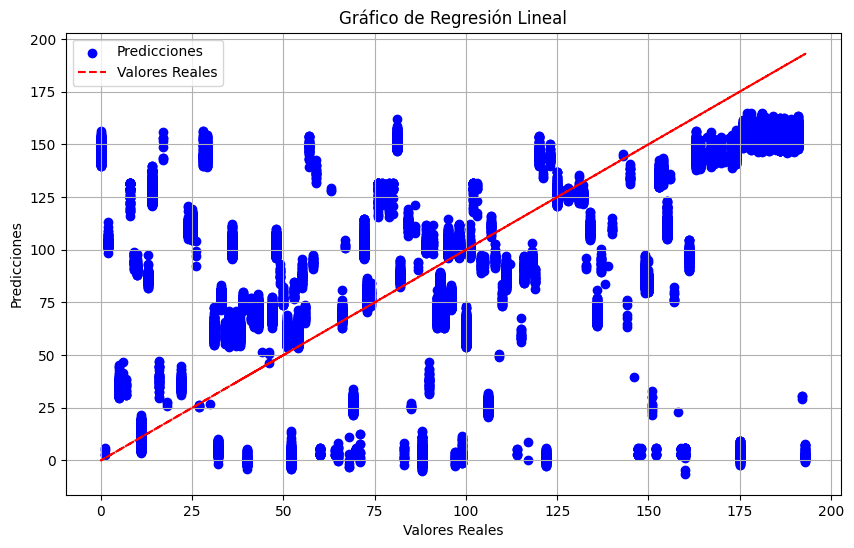

Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Región Metropolitana: 1661.105121038035
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Región Metropolitana: 1668.040952961714
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Región Metropolitana: 30.972202095596675
Error Absoluto Medio (MAE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Región Metropolitana: 30.905177852209253
-----------------------------------------------------------------------------------------------------------------------------
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Otras Regiones: 1891.8866616596342
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Otras Regiones: 1905.5483788895633
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Otras Regiones: 32.54131731847078
Error Absoluto Medio (MAE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Otras Regiones: 32.638411954637206


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_evaluate_plot_linear_regression(df):

    X = df[features]
    y = df[target]


    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train, y_train)

    y_pred_train = lin_reg_model.predict(X_train)
    y_pred_test = lin_reg_model.predict(X_test)


    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)


    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, color='blue', label='Predicciones')
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Valores Reales')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Gráfico de Regresión Lineal')
    plt.legend()
    plt.grid()
    plt.show()

    return train_mse, test_mse, train_mae, test_mae


train_mse_region_13, test_mse_region_13, train_mae_region_13, test_mae_region_13 = train_evaluate_plot_linear_regression(df_region_13)


train_mse_otras_regiones, test_mse_otras_regiones, train_mae_otras_regiones, test_mae_otras_regiones = train_evaluate_plot_linear_regression(df_otras_regiones)

print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Región Metropolitana: {train_mse_region_13}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Región Metropolitana: {test_mse_region_13}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Región Metropolitana: {train_mae_region_13}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Región Metropolitana: {test_mae_region_13}')
print(f'-----------------------------------------------------------------------------------------------------------------------------')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Otras Regiones: {train_mse_otras_regiones}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Otras Regiones: {test_mse_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO REGRESIÓN LINEAL - Otras Regiones: {train_mae_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - MODELO REGRESIÓN LINEAL - Otras Regiones: {test_mae_otras_regiones}')


Región Metropolitana: El modelo está funcionando bastante bien, con un rendimiento equilibrado entre los conjuntos de entrenamiento y prueba, lo que indica que está generalizando de manera adecuada. \
Otras Regiones: Aunque el rendimiento es algo inferior en las Otras Regiones (con errores algo más altos), el modelo sigue generalizando bien sin grandes diferencias entre el entrenamiento y la prueba.

#### MODELO 2: EVALUACIÓN SUPPORT VECTOR MACHINE REGRESIÓN (SVR)

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_evaluate_svr(df):

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    X_subset = X_train_scaled[:100]
    y_subset = y_train[:100]


    svr_rbf = SVR(kernel='rbf')
    svr_rbf.fit(X_subset, y_subset)


    y_pred_train = svr_rbf.predict(X_train_scaled)
    y_pred_test = svr_rbf.predict(X_test_scaled)


    mse_rbf_train = mean_squared_error(y_train, y_pred_train)
    mse_rbf_test = mean_squared_error(y_test, y_pred_test)
    mae_rbf_train = mean_absolute_error(y_train, y_pred_train)
    mae_rbf_test = mean_absolute_error(y_test, y_pred_test)

    print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO SUPPORT VECTOR MACHINE: {mse_rbf_train}')
    print(f'Error Cuadrático Medio (MSE) SET PRUEBA - MODELO SUPPORT VECTOR MACHINE: {mse_rbf_test}')
    print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO SUPPORT VECTOR MACHINE: {mae_rbf_train}')
    print(f'Error Absoluto Medio (MAE) SET PRUEBA - MODELO SUPPORT VECTOR MACHINE: {mae_rbf_test}')


print("Evaluando el modelo para la Región Metropolitana:")
train_evaluate_svr(df_region_13)
print("-------------------------------------------------------")

print("Evaluando el modelo para Otras Regiones:")
train_evaluate_svr(df_otras_regiones)


Evaluando el modelo para la Región Metropolitana:
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO SUPPORT VECTOR MACHINE: 3743.7123208145786
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO SUPPORT VECTOR MACHINE: 3753.1047248875334
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO SUPPORT VECTOR MACHINE: 49.48224136342906
Error Absoluto Medio (MAE) SET PRUEBA - MODELO SUPPORT VECTOR MACHINE: 49.47412307318443
-------------------------------------------------------
Evaluando el modelo para Otras Regiones:
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO SUPPORT VECTOR MACHINE: 3936.054317565811
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO SUPPORT VECTOR MACHINE: 3941.2484159843193
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO SUPPORT VECTOR MACHINE: 51.95992413543508
Error Absoluto Medio (MAE) SET PRUEBA - MODELO SUPPORT VECTOR MACHINE: 52.018422161141956


El modelo de Support Vector Machine Regresión (SVR) está generalizando de manera consistente, ya que los valores de MSE y MAE son muy similares entre los conjuntos de entrenamiento y prueba en ambas regiones. Esto indica que el modelo no está sobreajustando a los datos de entrenamiento.

Aunque el modelo está generalizando bien, el MAE (alrededor de 50 unidades en promedio) muestra que el margen de error en las predicciones es considerable. Esto sugiere que el modelo tiene dificultades para hacer predicciones precisas y está cometiendo errores significativos en ambas regiones.

#### MODELO 3: EVALUACIÓN ÁRBOL DE DECISIÓN REGRESIÓN

Evaluando el modelo para la Región Metropolitana:
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO ÁRBOL DE DECISIÓN: 977.0410562567134
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO ÁRBOL DE DECISIÓN: 975.2984040918501
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO ÁRBOL DE DECISIÓN: 21.558414898458736
Error Absoluto Medio (MAE) SET PRUEBA - MODELO ÁRBOL DE DECISIÓN: 21.39085847239494


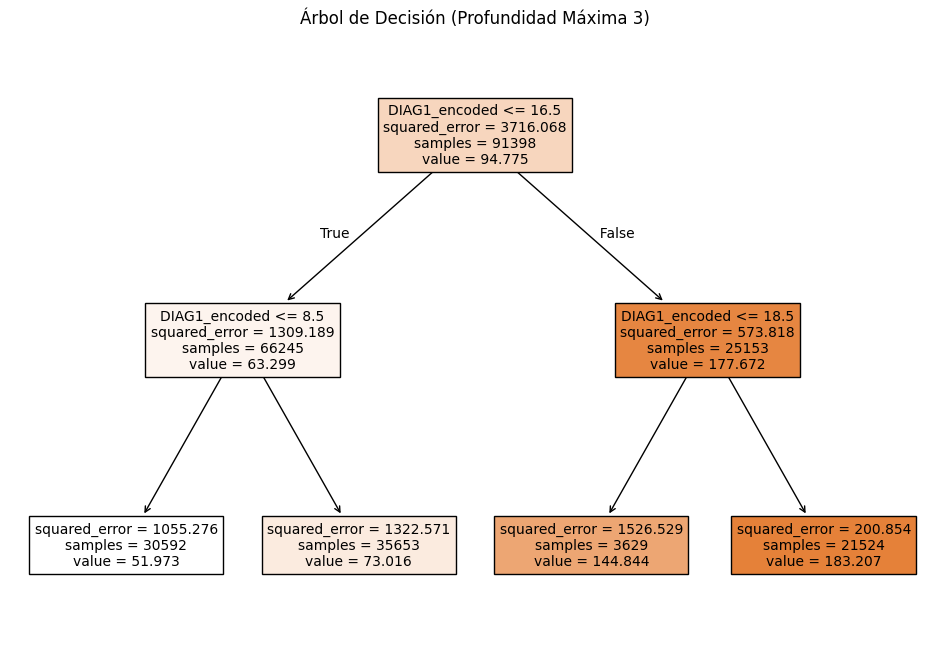

Evaluando el modelo para Otras Regiones:
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO ÁRBOL DE DECISIÓN: 1131.1848357030651
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO ÁRBOL DE DECISIÓN: 1135.9626350960386
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO ÁRBOL DE DECISIÓN: 23.226729829562263
Error Absoluto Medio (MAE) SET PRUEBA - MODELO ÁRBOL DE DECISIÓN: 23.27242768924924


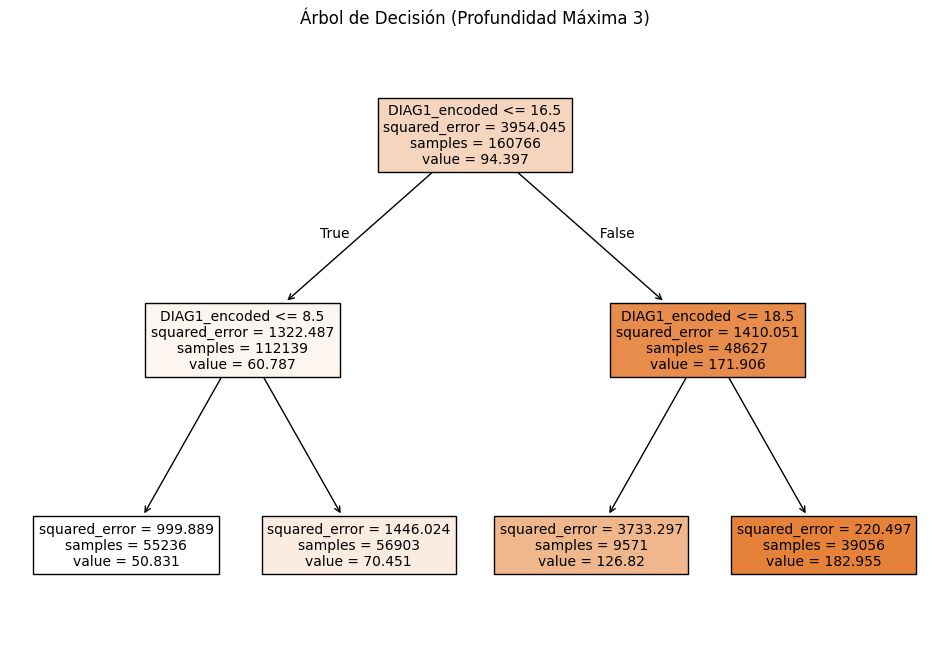

In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


imputer = SimpleImputer(strategy='mean')


def train_evaluate_decision_tree(df):

    X = df[features]
    y = df[target]


    X_imputed = imputer.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


    tree_model = DecisionTreeRegressor(max_depth=2, random_state=42)
    tree_model.fit(X_train, y_train)


    y_pred_train = tree_model.predict(X_train)
    y_pred_test = tree_model.predict(X_test)


    train_mse_tree = mean_squared_error(y_train, y_pred_train)
    test_mse_tree = mean_squared_error(y_test, y_pred_test)
    train_mae_tree = mean_absolute_error(y_train, y_pred_train)
    test_mae_tree = mean_absolute_error(y_test, y_pred_test)

    print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO ÁRBOL DE DECISIÓN: {train_mse_tree}')
    print(f'Error Cuadrático Medio (MSE) SET PRUEBA - MODELO ÁRBOL DE DECISIÓN: {test_mse_tree}')
    print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO ÁRBOL DE DECISIÓN: {train_mae_tree}')
    print(f'Error Absoluto Medio (MAE) SET PRUEBA - MODELO ÁRBOL DE DECISIÓN: {test_mae_tree}')
    

    plt.figure(figsize=(12, 8))
    plot_tree(tree_model, filled=True, feature_names=features, fontsize=10)
    plt.title('Árbol de Decisión (Profundidad Máxima 3)')
    plt.show()


print("Evaluando el modelo para la Región Metropolitana:")
train_evaluate_decision_tree(df_region_13)


print("Evaluando el modelo para Otras Regiones:")
train_evaluate_decision_tree(df_otras_regiones)


El Árbol de Decisión de Regresión está generalizando de manera excelente en ambas regiones, ya que las diferencias entre los valores de MSE y MAE en los conjuntos de entrenamiento y prueba son mínimas. Esto sugiere que el modelo no está sobreajustando a los datos de entrenamiento, sino que está capturando patrones de manera efectiva y aplicándolos de manera robusta a los datos de prueba.

Los valores del MAE indican que el modelo tiene un buen rendimiento, con un margen de error bajo en ambas regiones (alrededor de 21-23 unidades en promedio). Esto significa que el modelo es bastante preciso en sus predicciones y ofrece resultados confiables en ambos conjuntos de datos.

### MODELOS DE CLASIFICACIÓN

#### MODELO 1: EVALUACIÓN GRADIENT BOOSTING CLASIFICACIÓN

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_evaluate_gradient_boosting(df):

    df_sampled = df.sample(frac=0.1, random_state=42)


    X = df_sampled[features]
    y = df_sampled[target] - 1  


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    gb_model = OneVsRestClassifier(GradientBoostingClassifier(random_state=42))
    gb_model.fit(X_train, y_train)


    y_test_pred = gb_model.predict(X_test)


    mse_train_gb = mean_squared_error(y_train, gb_model.predict(X_train))
    mse_test_gb = mean_squared_error(y_test, gb_model.predict(X_test))
    mae_train_gb = mean_absolute_error(y_train, gb_model.predict(X_train))
    mae_test_gb = mean_absolute_error(y_test, gb_model.predict(X_test))


    print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO GRADIENT BOOSTING: {mse_train_gb}')
    print(f'Error Cuadrático Medio (MSE) SET PRUEBA - MODELO GRADIENT BOOSTING: {mse_test_gb}')
    print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO GRADIENT BOOSTING: {mae_train_gb}')
    print(f'Error Absoluto Medio (MAE) SET PRUEBA - MODELO GRADIENT BOOSTING: {mae_test_gb}')


    f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_test_pred, average='weighted')

    print(f"\nF1 Score (Promedio Ponderado - Test): {f1_weighted}")
    print(f"Precisión (Promedio Ponderado - Test): {precision_weighted}")
    print(f"Recall (Promedio Ponderado - Test): {recall_weighted}")


print("Evaluando el modelo para la Región Metropolitana:")
train_evaluate_gradient_boosting(df_region_13)


print("Evaluando el modelo para Otras Regiones:")
train_evaluate_gradient_boosting(df_otras_regiones)

Evaluando el modelo para la Región Metropolitana:
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO GRADIENT BOOSTING: 1657.0130205840114
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO GRADIENT BOOSTING: 1784.583078101072
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO GRADIENT BOOSTING: 20.66203925323121
Error Absoluto Medio (MAE) SET PRUEBA - MODELO GRADIENT BOOSTING: 22.528713629402755

F1 Score (Promedio Ponderado - Test): 0.3646150505942973
Precisión (Promedio Ponderado - Test): 0.36603771568380244
Recall (Promedio Ponderado - Test): 0.4127105666156202
Evaluando el modelo para Otras Regiones:


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO GRADIENT BOOSTING: 1488.3803951450498
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO GRADIENT BOOSTING: 1619.739878101872
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO GRADIENT BOOSTING: 19.076416480705383
Error Absoluto Medio (MAE) SET PRUEBA - MODELO GRADIENT BOOSTING: 20.566173269481933

F1 Score (Promedio Ponderado - Test): 0.38219866408030173
Precisión (Promedio Ponderado - Test): 0.37847069570161157
Recall (Promedio Ponderado - Test): 0.4360034828036569


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo de Gradient Boosting está generalizando de manera razonable en ambas regiones. Aunque los errores en el conjunto de prueba son un poco más altos que en el entrenamiento, no hay signos claros de overfitting, ya que la diferencia entre los conjuntos es relativamente pequeña.

Los valores de MAE muestran que el modelo tiene un buen rendimiento, con un error promedio bajo tanto en la Región Metropolitana como en las Otras Regiones.

Los valores de F1 Score, Precisión, y Recall sugieren que el modelo tiene un rendimiento moderado en términos de clasificación. El Recall más alto en las Otras Regiones indica que el modelo está capturando más clases relevantes en esta región, mientras que en la Región Metropolitana, el rendimiento es un poco más equilibrado entre precisión y recall.

#### MODELO 2: EVALUACIÓN REGRESIÓN LOGISTICA

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_evaluate_logistic_regression(df):

    X = df[features]
    y = df[target] - 1 


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
    log_reg_model.fit(X_train, y_train)


    y_test_pred = log_reg_model.predict(X_test)


    mse_train_log_reg = mean_squared_error(y_train, log_reg_model.predict(X_train))
    mse_test_log_reg = mean_squared_error(y_test, log_reg_model.predict(X_test))
    mae_train_log_reg = mean_absolute_error(y_train, log_reg_model.predict(X_train))
    mae_test_log_reg = mean_absolute_error(y_test, log_reg_model.predict(X_test))


    print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO REGRESIÓN LOGÍSTICA: {mse_train_log_reg}')
    print(f'Error Cuadrático Medio (MSE) SET PRUEBA - MODELO REGRESIÓN LOGÍSTICA: {mse_test_log_reg}')
    print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO REGRESIÓN LOGÍSTICA: {mae_train_log_reg}')
    print(f'Error Absoluto Medio (MAE) SET PRUEBA - MODELO REGRESIÓN LOGÍSTICA: {mae_test_log_reg}')


    f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_test_pred, average='weighted')

    print(f"\nF1 Score (Promedio Ponderado - Test): {f1_weighted}")
    print(f"Precisión (Promedio Ponderado - Test): {precision_weighted}")
    print(f"Recall (Promedio Ponderado - Test): {recall_weighted}")


print("Evaluando el modelo para la Región Metropolitana:")
train_evaluate_logistic_regression(df_region_13)

print("Evaluando el modelo para Otras Regiones:")
train_evaluate_logistic_regression(df_otras_regiones)


Evaluando el modelo para la Región Metropolitana:
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO REGRESIÓN LOGÍSTICA: 1148.4088650615097
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO REGRESIÓN LOGÍSTICA: 1148.5133644788236
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO REGRESIÓN LOGÍSTICA: 18.041300081374754
Error Absoluto Medio (MAE) SET PRUEBA - MODELO REGRESIÓN LOGÍSTICA: 18.010875392509764

F1 Score (Promedio Ponderado - Test): 0.2820392950560692
Precisión (Promedio Ponderado - Test): 0.24658619892096792
Recall (Promedio Ponderado - Test): 0.39522861300451867
Evaluando el modelo para Otras Regiones:


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO REGRESIÓN LOGÍSTICA: 1407.2533839865457
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO REGRESIÓN LOGÍSTICA: 1407.3204162494012
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO REGRESIÓN LOGÍSTICA: 19.51252088628608
Error Absoluto Medio (MAE) SET PRUEBA - MODELO REGRESIÓN LOGÍSTICA: 19.552923760177645

F1 Score (Promedio Ponderado - Test): 0.30495376801869023
Precisión (Promedio Ponderado - Test): 0.280882382202022
Recall (Promedio Ponderado - Test): 0.40967475072930726


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo de Regresión Logística está generalizando bien en ambas regiones, ya que las diferencias entre los valores de MSE y MAE en los conjuntos de entrenamiento y prueba son mínimas. No hay signos evidentes de overfitting.

Los valores de MAE sugieren que el modelo tiene un error promedio relativamente bajo, con un buen ajuste tanto en la Región Metropolitana como en las Otras Regiones.

Las métricas de clasificación indican que el modelo tiene un rendimiento modesto, con Recall cercanos al 40% en ambas regiones, lo que sugiere que el modelo está capturando una cantidad aceptable de clases relevantes. Sin embargo, la precisión es relativamente baja, lo que indica que el modelo está cometiendo más errores en las predicciones positivas.

#### MODELO 3: EVALUACIÓN RANDOM FOREST CLASSIFIER

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


def calculate_metrics_full(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    return mse_train, mse_test, mae_train, mae_test


def train_evaluate_random_forest(df):
    features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
    target = 'GRUPO_DIAG1_ENCODED'

    for feature in features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')


    X = df[features]
    y = df[target]


    y = y - 1


    df_sampled = df.sample(frac=0.1, random_state=42)
    X_sampled = df_sampled[features]
    y_sampled = df_sampled[target] - 1


    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)


    y_test_pred = rf_model.predict(X_test)


    mse_train_rf, mse_test_rf, mae_train_rf, mae_test_rf = calculate_metrics_full(rf_model, X_train, y_train, X_test, y_test)

    print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO RANDOM FOREST CLASSIFIER: {mse_train_rf}')
    print(f'Error Cuadrático Medio (MSE) SET PRUEBA - MODELO RANDOM FOREST CLASSIFIER: {mse_test_rf}')
    print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO RANDOM FOREST CLASSIFIER: {mae_train_rf}')
    print(f'Error Absoluto Medio (MAE) SET PRUEBA - MODELO RANDOM FOREST CLASSIFIER: {mae_test_rf}')

    f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_test_pred, average='weighted')

    print(f"\nF1 Score (Promedio Ponderado - Test): {f1_weighted}")
    print(f"Precisión (Promedio Ponderado - Test): {precision_weighted}")
    print(f"Recall (Promedio Ponderado - Test): {recall_weighted}")


print("Evaluando el modelo para la Región Metropolitana:")
train_evaluate_random_forest(df_region_13)

print("Evaluando el modelo para Otras Regiones:")
train_evaluate_random_forest(df_otras_regiones)


Evaluando el modelo para la Región Metropolitana:


C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3644392509.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')


Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO RANDOM FOREST CLASSIFIER: 652.6128291048349
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO RANDOM FOREST CLASSIFIER: 1098.6584992343032
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO RANDOM FOREST CLASSIFIER: 11.167161321206319
Error Absoluto Medio (MAE) SET PRUEBA - MODELO RANDOM FOREST CLASSIFIER: 16.885911179173046

F1 Score (Promedio Ponderado - Test): 0.3777803766078722
Precisión (Promedio Ponderado - Test): 0.37220094752142974
Recall (Promedio Ponderado - Test): 0.4119448698315467
Evaluando el modelo para Otras Regiones:


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\victo\AppData\Local\Temp\ipykernel_32592\3644392509.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - MODELO RANDOM FOREST CLASSIFIER: 377.68448266477986
Error Cuadrático Medio (MSE) SET PRUEBA - MODELO RANDOM FOREST CLASSIFIER: 1396.3012625163256
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - MODELO RANDOM FOREST CLASSIFIER: 6.396070320579111
Error Absoluto Medio (MAE) SET PRUEBA - MODELO RANDOM FOREST CLASSIFIER: 19.190683500217677

F1 Score (Promedio Ponderado - Test): 0.39471718362044556
Precisión (Promedio Ponderado - Test): 0.38860589334935763
Recall (Promedio Ponderado - Test): 0.40901175446234217


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El Random Forest Classifier está mostrando signos de overfitting en ambas regiones. La diferencia significativa entre los valores de MSE y MAE en los conjuntos de entrenamiento y prueba sugiere que el modelo está ajustándose demasiado a los datos de entrenamiento y no está generalizando bien en los datos de prueba.

Aunque los errores en el conjunto de prueba son mayores que en el conjunto de entrenamiento, los valores de MAE siguen siendo aceptables en ambas regiones, aunque más altos en las Otras Regiones.

El F1 Score, Precisión, y Recall muestran un rendimiento moderado en términos de clasificación, con un Recall cercano al 41% en ambas regiones, lo que indica que el modelo está capturando una cantidad razonable de clases relevantes, pero con margen para mejorar en términos de precisión y balance.

## CONCLUSIONES FASE 4, 5 Y 6

Primero, se realizó una prueba inicial sin aplicar técnicas de generalización ni balanceo de clases, lo que arrojó resultados considerablemente bajos. Los modelos no lograban capturar bien los patrones de los datos, lo que afectaba la precisión de las predicciones y la capacidad de generalización.

Posteriormente, al aplicar técnicas de balanceo de clases, como el sobremuestreo, se observó una mejora significativa en los resultados de los modelos. Esto permitió que los modelos capturaran mejor las clases minoritarias y ofrecieran un mejor rendimiento en las métricas de clasificación, lo que se tradujo en un equilibrio más robusto entre precisión, F1 Score, y Recall.

Además, al dividir el dataset en dos partes —una enfocada en la Región Metropolitana y la otra en las demás regiones excluyendo la Región Metropolitana— se obtuvieron resultados significativamente mejores que cuando se entrenó y evaluó el modelo en todas las regiones combinadas sin ningún tipo de filtro. Esta división permitió que los modelos se especializaran mejor en los patrones regionales, lo que condujo a predicciones más precisas y mejor generalización en ambos conjuntos de datos.

En resumen, la combinación de balanceo de clases y la segmentación regional del dataset contribuyó a una notable mejora en el rendimiento de los modelos, permitiendo un ajuste más preciso y una mejor capacidad para generalizar los resultados.

CONCLUSION MODELOS:

Random Forest Classifier (Modelo 6)

Región Metropolitana: \
MSE (Prueba): 1098.66 \
MAE (Prueba): 16.89 \
F1 Score: 0.378 \
Precisión: 0.372 \
Recall: 0.412 

Otras Regiones: \
MSE (Prueba): 1396.30 \
MAE (Prueba): 19.19 \
F1 Score: 0.395 \
Precisión: 0.389 \
Recall: 0.409 

El Random Forest Classifier muestra buenos resultados en ambas regiones, tanto en términos de error (MSE y MAE) como en las métricas de clasificación (con un F1 Score y Recall superiores a los de la mayoría de los otros modelos).

En resumen de todos los modelos entrenados y posteriormente evaluados, el Random Forest Classifier (Modelo 3 de clasificación) ofrece el mejor equilibrio entre error de predicción (MSE y MAE) y rendimiento en clasificación (F1 Score, Precisión y Recall) en ambas regiones. No solo tiene el MSE más bajo en la Región Metropolitana, sino que también tiene un rendimiento sólido en las Otras Regiones, siendo competitivo en todas las métricas.